In [229]:
#import sklearn as sk;
import pandas as pd;
import numpy as np; 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, cross_validate


Label: Human_Development_Index

Countrys: 
"Name" 
"Region" 

Education: 

Event:

Heath:

Month:

Population:

Quality of Life:

In [230]:
# load the datasets 
dfCountry = pd.read_csv('./Tables/Country.csv')
dfEducation = pd.read_csv('./Tables/Education.csv')
dfEvent = pd.read_csv('./Tables/Event.csv')
dfFactTable = pd.read_csv('./Tables/Fact_Table.csv')
dfHealth = pd.read_csv('./Tables/Health.csv')
dfMonth = pd.read_csv('./Tables/Month.csv')
dfPopulation = pd.read_csv('./Tables/Population.csv')
dfQualityOfLife = pd.read_csv('./Tables/Quality_of_Life.csv')

dfPopulation = dfPopulation.drop(["PopulationKey", "SurrogateKey", "Country", "Year"], axis=1)
dfEducation = dfEducation.drop(["EducationKey", "SurrogateKey", "Country", "Year"], axis=1)
dfHealth = dfHealth.drop(["HealthKey", "SurrogateKey", "Country", "Year"], axis=1)
dfQualityOfLife = dfQualityOfLife.drop(["QualityofLifeKey", "SurrogateKey"], axis=1)

print(dfEducation.shape[0])
print(dfHealth.shape[0])
print(dfPopulation.shape[0])
print(dfQualityOfLife.shape[0])

canada = dfFactTable.loc[dfFactTable['CountryKey'] == 2]
unitedStates = dfFactTable.loc[dfFactTable['CountryKey'] == 8]
mexico = dfFactTable.loc[dfFactTable['CountryKey'] == 5]
mauritius = dfFactTable.loc[dfFactTable['CountryKey'] == 6]
liberia = dfFactTable.loc[dfFactTable['CountryKey'] == 4]
congo = dfFactTable.loc[dfFactTable['CountryKey'] == 3]
vietnam = dfFactTable.loc[dfFactTable['CountryKey'] == 9]
nepal = dfFactTable.loc[dfFactTable['CountryKey'] == 7]
bangladesh = dfFactTable.loc[dfFactTable['CountryKey'] == 1]

fixedFact = pd.concat([canada, unitedStates, mexico, mauritius, liberia, congo, vietnam, nepal, bangladesh],ignore_index=True)
fixedFact = fixedFact.drop(["MonthKey","CountryKey", "EducationKey",  "QualityofLifeKey", "HealthKey", "EventKey", "PopulationKey", "Development_Index"], axis=1) 

df = pd.concat([dfQualityOfLife, dfHealth, dfPopulation, dfEducation, fixedFact], axis=1)

# print the shape of the dataframes 
print(f"Test Data shape: \n{dfCountry}\n")
print(f"Test Data shape: \n{dfEducation.shape}\n")
print(f"Test Data shape: \n{dfEvent.shape}\n")
print(f"Test Data shape: \n{dfFactTable.shape}\n")
print(f"Test Data shape: \n{dfHealth.shape}\n")
print(f"Test Data shape: \n{dfMonth.shape}\n")
print(f"Test Data shape: \n{dfPopulation.shape}\n")
print(f"Test Data shape: \n{dfQualityOfLife.shape}\n")
print("_____________________________________________\n")


    #scatterPlot


#print(f"Health Scatterplot: \n{scatterHealth}\n")




144
144
144
144
Test Data shape: 
   CountryKey  SurrogateKey             Name                     Region  \
0           1            20       Bangladesh                 South Asia   
1           2            35           Canada              North America   
2           3            43  Dem. Rep. Congo         Sub-Saharan Africa   
3           4           130          Liberia         Sub-Saharan Africa   
4           5           153           Mexico  Latin America & Caribbean   
5           6           166        Mauritius         Sub-Saharan Africa   
6           7           177            Nepal                 South Asia   
7           8           250    United States              North America   
8           9           256          Vietnam        East Asia & Pacific   

       Continent          Currency        Capital WB-2_Code Country_Code  \
0           Asia  Bangladeshi taka          Dhaka        BD          BGD   
1  North America   Canadian dollar         Ottawa        CA    

for item in (df.columns.values):
     scatterPlot = df.plot.scatter(x=item, y='Human_Development_Index', c='orange')
     scatterPlot.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
     scatterPlot.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
     scatterPlot.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
     scatterPlot.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black
     scatterPlot.spines['left'].set_color('white')        # setting up Y-axis tick color to red
     scatterPlot.spines['top'].set_color('white')         #setting up above X-axis tick color to red

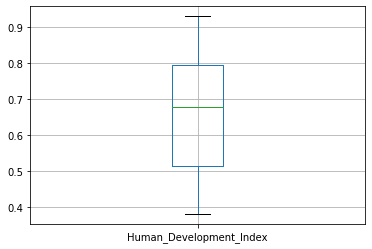

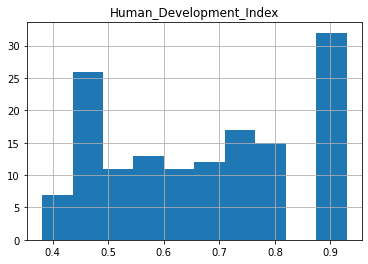

In [231]:
boxplot = df.boxplot(column = 'Human_Development_Index')
histogram = df.hist(column='Human_Development_Index')

In [232]:
#Finds the percentage of nulls within each column
percent_missing = df.isnull().sum() * 100 / len(df)

#Takes any columns that have a % of nulls greater than 1/3, and drops them from the dataframe
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print("\n\n Below are the percentages of nulls in each of our possible features:")
print("_____________________________________________________________________\n ")
print(missing_value_df)
df = df.drop(missing_value_df[percent_missing>33.33].index, axis=1)

df["Population,_total"] = df["Population,_total"].astype('float64')
df["Population,_male"] = df["Population,_male"].astype('float64')
df["Population,_female"] = df["Population,_female"].astype('float64')
df["Quality_of_Life"] = df["Quality_of_Life"].astype('float64')




 Below are the percentages of nulls in each of our possible features:
_____________________________________________________________________
 
                                                    percent_missing
Country                                                    0.000000
Age_dependency_ratio,_young                                0.000000
Age_dependency_ratio_(%_of_working-age_population)         0.000000
Urban_population_(%_of_total_population)                   0.000000
Rural_population_(%_of_total_population)                   0.000000
Population_growth_(annual_%)                               0.000000
Population,_female                                         0.000000
Population,_male                                           0.000000
Population,_total                                          0.000000
Quality_of_Life                                            0.000000
Unemployment,_total(%_of_total_labor_force)                0.000000
Human_Development_Index                 

C:\Users\jacob\AppData\Local\Temp/ipykernel_14140/1009057893.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(missing_value_df[percent_missing>33.33].index, axis=1)


In [233]:
print(f"dataframe datatypes:\n")
print(df.dtypes)
print("\n")
print("_____________________________________________\n")


dataframe datatypes:

Country                                                            object
Year                                                               object
People_practicing_open_defecation(%_of_population)                float64
%_of_population_using_least_basic_sanitation_services             float64
%_of_population_using_at_least_basic_drinking_water_services      float64
Labor_force,_female(%_of_total_labor_force)                       float64
Unemployment,_male(%_of_male_labor_force)                         float64
Unemployment,_female(%_of_female_labor_force)                     float64
Unemployment,_total(%_of_total_labor_force)                       float64
Domestic_government_health_expenditure_per_capita(current US$)    float64
Immunization_HepB3(%_of_one-year-old_children)                    float64
Adults(ages_15+)_and_children(0-14_years)_living_with_HIV         float64
Out-of-pocket_expenditure(%_of _current_health_expenditure)       float64
Mortality_from_C

In [234]:
#Split
data_train, data_test = train_test_split(df, test_size=0.2, random_state=42)
print(f"Train Data shape: \n{data_train}\n")
print(f"Test Data shape: \n{data_test}\n")


Train Data shape: 
             Country        Year  \
124            Nepal  2017-01-01   
31     United States  2020-01-01   
98           Vietnam  2007-01-01   
36            Mexico  2009-01-01   
16     United States  2005-01-01   
..               ...         ...   
71           Liberia  2012-01-01   
106          Vietnam  2015-01-01   
14            Canada  2019-01-01   
92   Dem. Rep. Congo  2017-01-01   
102          Vietnam  2011-01-01   

     People_practicing_open_defecation(%_of_population)  \
124                                          18.260935    
31                                            0.000000    
98                                           10.968711    
36                                            4.966066    
16                                            0.000000    
..                                                 ...    
71                                           44.183975    
106                                           3.845596    
14               

In [235]:
# separate the features and the labels to be used in model development
columns = data_train.columns.to_list()
columns_drop = columns.pop(-1)
labels_train = data_train.drop(columns, axis=1)
labels_test = data_test.drop(columns, axis=1)
print(f"labels_train: \n{labels_train}\n")
print(f"labels_test: \n{labels_test}\n")
features_train = data_train.drop(['Human_Development_Index'], axis=1)
features_test = data_test.drop(['Human_Development_Index'], axis=1)
print(f"features_train: \n{features_train }\n")
print(f"lfeatures_test: \n{features_test }\n")

labels_train: 
     Human_Development_Index
124                    0.588
31                     0.926
98                     0.640
36                     0.748
16                     0.900
..                       ...
71                     0.469
106                    0.688
14                     0.929
92                     0.475
102                    0.671

[115 rows x 1 columns]

labels_test: 
     Human_Development_Index
117                    0.537
19                     0.911
82                     0.400
97                     0.632
56                     0.779
12                     0.926
132                    0.543
65                     0.438
66                     0.445
18                     0.906
51                     0.738
78                     0.480
94                     0.480
133                    0.557
100                    0.659
64                     0.432
27                     0.922
69                     0.455
125                    0.596
73                

In [236]:
#Min max normalization of the numerical data (to bring all values in between 0 and 1)
numerical_df_train = features_train.drop(["Country", "Year"], axis=1)
numerical_df_test = features_test.drop(["Country", "Year"], axis=1)
#normalized_df_train = (numerical_df_train-numerical_df_train.min())/(numerical_df_train.max()-numerical_df_train.min())
#normalized_df_test = (numerical_df_test-numerical_df_test.min())/(numerical_df_test.max()-numerical_df_test.min())
#normalized_df_train
#normalized_df_test


In [237]:
# select one of the scaling strategies and briefly explain why it is essential to scale your features in the markdown cell mentioned below (3)

# create the necessary pipelines and combine the features to be used as the training data for the given algorithm (8)

num_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(numerical_df_train)
cat_attribs = ["Country", "Year"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])
features_train = features_train.reset_index(drop=True)

data_prepared = pd.DataFrame(full_pipeline.fit_transform(features_train),columns=features_train.columns, index=features_train.index)
#full_pipeline.fit_transform(data_train)
#pd.DataFrame(full_pipeline.fit_transform(train_df),columns=train_df.columns, index=train_df.index)
print(data_prepared)


      Country      Year  People_practicing_open_defecation(%_of_population)  \
0    0.576955 -0.008290                                           0.092637    
1   -0.706815  1.068273                                           0.683891    
2    0.064301 -0.009492                                          -0.029290    
3   -0.357694  0.586741                                           0.444297    
4   -0.706815  1.074659                                           0.629259    
..        ...       ...                                                ...    
110  2.399383 -1.558742                                          -0.859927    
111 -0.436464  0.470627                                           0.336127    
112 -0.706815  1.047840                                           0.648779    
113  0.126540 -1.556702                                          -2.280817    
114 -0.192313  0.233715                                           0.141267    

     %_of_population_using_least_basic_sanitation_s

In [238]:
# create the following four different models with their default hyperparameter values to be trained using the preprocessed data (0.5 * 4)
labelTrainFlat = labels_train.values.ravel()
# Gradient Boosting
gradientBoosting = GradientBoostingRegressor()
gradientBoosting = gradientBoosting.fit(data_prepared, labelTrainFlat)

# Decision Trees
decisionTree = DecisionTreeRegressor()
decisionTree = decisionTree.fit(data_prepared,labelTrainFlat)

# Random Forests
randomForest = RandomForestRegressor()
randomForest = randomForest.fit(data_prepared,labelTrainFlat)


In [239]:
parametersGradientBoosting = [
    {'n_estimators': [7,10,20],'min_samples_split': [2,3], 'min_samples_leaf': [4,5], 'alpha': [0.9,0.8,0.4]}
]

parametersDecisionTree = [
    {'max_depth': [1,2,3,4],'min_samples_split': [2,3], 'min_samples_leaf': [4,5]}
]

parametersRandomForest = [
    {'max_depth': [1,2,3,4],'min_samples_split': [2,3], 'bootstrap': [True, False]}
]

# initialize gridsearch with the required parameters, including the following scoring methods and refit='bal_accuracy' (2)
scoringX = {"accuracy": "accuracy", "bal_accuracy": "balanced_accuracy", "F1_macro": "f1_macro"}

grid_searchGradientBoosting = GridSearchCV(gradientBoosting, parametersGradientBoosting, cv=5, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')

grid_searchDecisionTree = GridSearchCV(decisionTree, parametersDecisionTree, cv=5, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')

grid_searchRandomForest = GridSearchCV(randomForest, parametersRandomForest, cv=5, scoring = scoringX, return_train_score=True, n_jobs=-1, refit='bal_accuracy')



# fit the training data (0.5)
grid_searchGradientBoosting.fit(data_prepared, labelTrainFlat)
grid_searchDecisionTree.fit(data_prepared, labelTrainFlat)
grid_searchRandomForest.fit(data_prepared, labelTrainFlat)

# print the best parameters (0.5)
print(f"Best parameters GradientBoosting: \n{grid_searchGradientBoosting.best_params_}\n")
print(f"Best parameters DecisionTree: \n{grid_searchDecisionTree.best_params_}\n")
print(f"Best parameters RandomForest: \n{grid_searchRandomForest.best_params_}\n")



C:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more

Best parameters GradientBoosting: 
{'alpha': 0.9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 7}

Best parameters DecisionTree: 
{'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 2}

Best parameters RandomForest: 
{'bootstrap': True, 'max_depth': 1, 'min_samples_split': 2}



C:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\jacob\anaconda3\envs\csi4106\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
